# Задание 1. Анализ данных и SQL-запросы

In [ ]:
#1.1 Количество уникальных пользователей за последние 30 дней

"""

    SELECT
    count(DISTINCT customer_id)

    FROM
    orders

    WHERE
    order_date BETWEEN (current_timestamp - interval '30 day') and (current_timestamp)

"""

In [ ]:
#1.2 Количество покупок и общая сумма продаж за последние 30 дней

"""
    SELECT
    count(orders.order_id) as orders_count,
    sum(order_itmes.quantity * order_itmes.price) as orders_sum

    FROM
    orders
    JOIN order_times on order_items.order_id = orders.order_id

    WHERE
    orders.order_date BETWEEN (current_timestamp - interval '30 day') and (current_timestamp)
    
"""

In [ ]:
#1.3 Средний чек и средний LTV для каждой категории продуктов

"""
    SELECT
    categories.category_name,
    avg(order_itmes.quantity * order_itmes.price) as avg_check,
    avg(order_itmes.quantity * order_itmes.price) OVER (PARTITION BY categories.category_id) as avg_revenue --(avg() - стоимость привлечения - удержание) as ltv
    
    FROM
    categories
    JOIN products on categories.category_id = products.category_id
    JOIN order_itmes on products.product_id = order_items.product_id


    GROUP BY categories.category_id

"""

In [ ]:
#1.4. Топ-5 продуктов по количеству покупок и выручке за последние 30 дней

"""
    SELECT DISTINCT product_name, count, orders_sum
    
    (SELECT 
    products.product_name,
    count(order_itmes.product_id) OVER(PARTITION BY order_itmes.product_id) as count,
    sum(order_itmes.quantity * order_itmes.price) OVER(PARTITION BY order_itmes.product_id) as orders_sum

    FROM
    products
    JOIN order_items on products.product_id = order_items.product_id
    JOIN orders on order_items.order_id = orders.order_id

    WHERE
    orders.order_date BETWEEN (current_timestamp - interval '30 day') and (current_timestamp)


    ORDER BY count, orders_sum

    LIMIT 5

"""


In [ ]:
#1.5. Сегментировать пользователей на группы по частоте использования продукта и выявить основные различия между этими группами
"""

    SELECT 
        customers.customer_name,
        count(orders.customer_id) OVER(PARTITION BY orders.customer_id) as purchases_per_user


        CASE  
        WHEN purchases_per_user > 1 THEN 'Более одной покупки'
        ELSE 'Одна покупка или меньше'
        END AS group

    FROM customers
    JOIN orders on customers.customer_id  = orders.customer_id 
    JOIN order_items on orders.order_id = order_items.order_id 

    ORDER BY new_price DESC, product_id

"""

# Задание 2. Проведение A/B-теста

In [ ]:
#2.1. Формулирование гипотезы и определение ключевых метрик:

"""
Ключевые метрики - вовлеченность, конверсия

Нулевая гипотеза - система достижений не повлияет на вовлеченность и конверсию

Альтернативная гипотеза - вовлеченность и конверсия вырастут

"""

In [ ]:
#2.2. Определение размера выборки и продолжительности теста:

"""

Мы предполагаем, что вовлеченность и конверсия вырастут на Х процентов, 
и имеем уникальных пользователей в месяц Y (или новые пользователи, старые пользователи, сегмент)

И договариваемся, что уровнем значимости будет Z 

И заходим в калькулятор чтобы посчитать то, что нам нужно:

Калькулятор: https://www.evanmiller.org/ab-testing/sample-size.html

Baseline conversion rate вводим текущее значение конверсии или вовлеченности

Minimum Detectable Effect вводим ожидаемый прирост X

Significance level вводим уровень значимости Z

Получаем Sample size per variation, который говорит нам о необходимом количестве испытуемых в каждой из двух групп


Альтернативный калькулятор: https://mindbox.ru/academy/ab-test-calculator/

Чтобы посчитать продолжительность, мы считаем (количество испытуемых на группу * 2) / Y

"""

In [ ]:
#2.3. Описание сценария подготовки и проведения теста:

"""
1. Постановка цели - ввести систему достижений

2. Выбрать метрику - вовлеченность и конверсия

3. Определить гипотезы - 2.1

4. Определить кто попадет под a/b тест, разбить их на группы, посчитать размера выборки и продолжительность теста 2.2

5. Ждать результатов эксперимента, не заканчивая его заранее (кроме случаев, когда можно статистически доказать,
 что уже никакие изменения не повлияют на результат)

6. Анализировать результаты - есть ли разница, и не случайна ли она

    А. Разница есть, но нет уверенности в том, что она не случайна - принимаем нулевую гипотезу 
    (система достижений не повлияет на вовлеченность и конверсию), 
    отказываемся (и ищем другую) или дорабатываем идею ввести систему достижений

    Б. Разница есть и она не случайна - принимаем альтернативную гипотезу 
    (вовлеченность и конверсия вырастут), так же вводим систему достижений
    на остальных пользователей

"""

# Задание 3. Создание дашборда

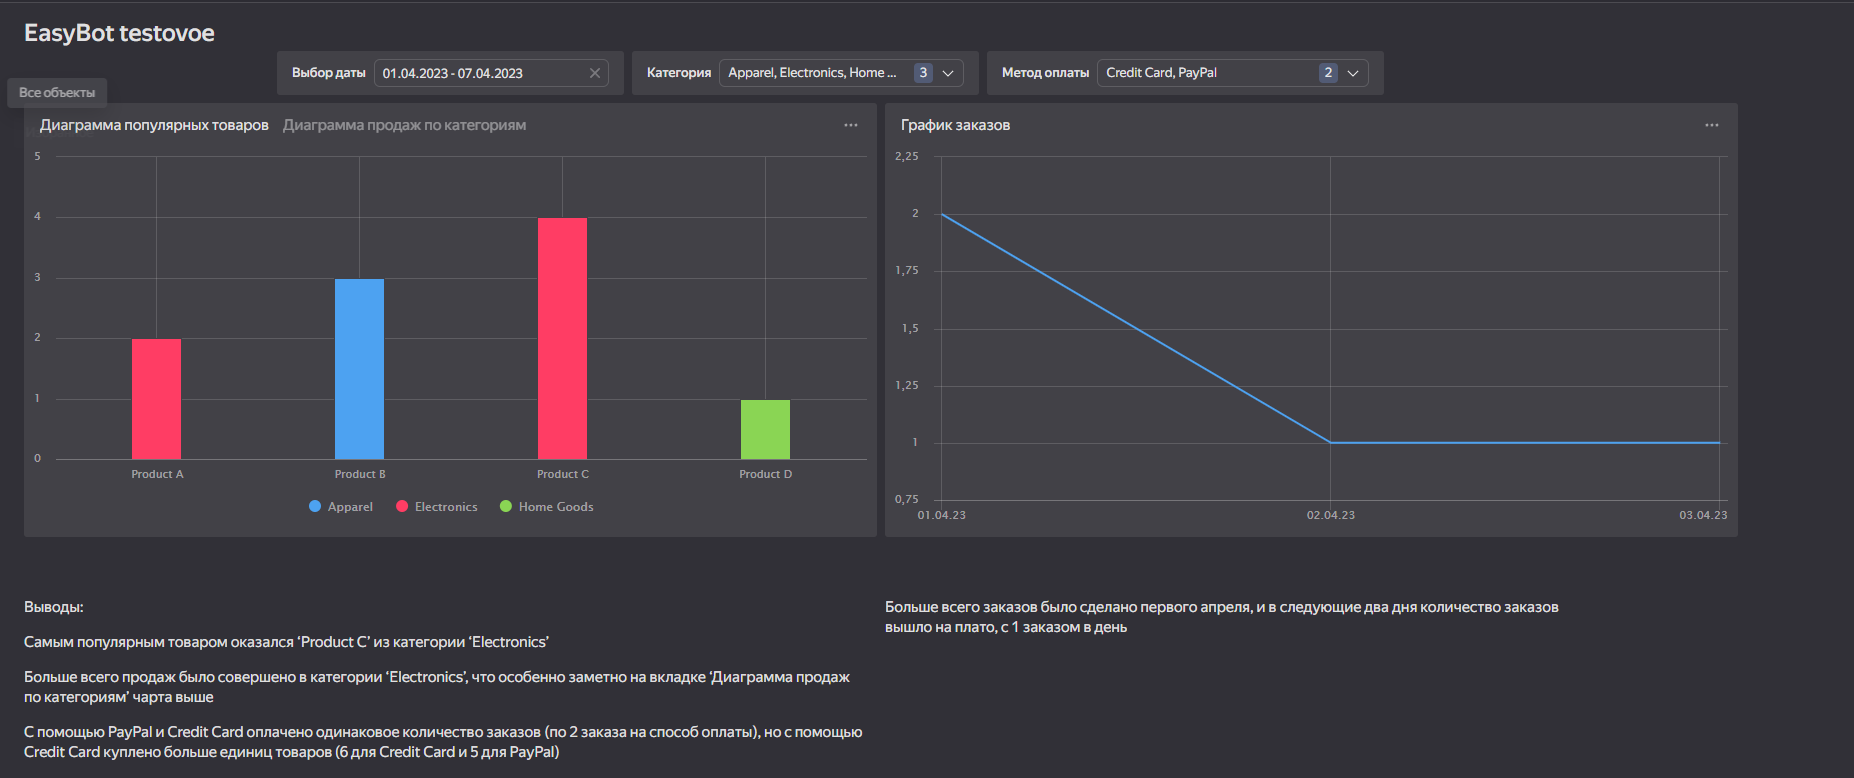

https://datalens.yandex/aq9m54qjw6ys0

# Задание 4. Презентация результатов

https://docs.google.com/presentation/d/1OmM2pXCTyQ8wKhkNMj7i0aULfOC2ijGWm64T2YIQ2K4/edit?usp=sharing